**Ejercicio:** Regresión lineal simple<br>
**Ejemplo práctico:** Información respecto a cantidad de horas de estudio y calificaciones obtenidas por varios estudiante<br>
**Por:** Laura Leyva

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Crear un dataset
x=[2, 3, 4, 5, 6, 7, 8, 9, 10]
y=[65, 67, 72, 78, 80, 85, 89, 92, 95]

data_dict = {"Horas_estudio":x,
             "Calificaciones":y}

# Convierte un dictionario en un dataframe
print("\nRegresión Lineal Simple")
df = pd.DataFrame(data_dict)
df


Regresión Lineal Simple


,Horas_estudio,Calificaciones
0,2,65
1,3,67
2,4,72
3,5,78
4,6,80
5,7,85
6,8,89
7,9,92
8,10,95


In [ ]:
#Calculos Iniciales
df['xy'] = df['Horas_estudio']*df['Calificaciones']
df['x2'] = df['Horas_estudio']**2
df

,Horas_estudio,Calificaciones,xy,x2
0,2,65,130,4
1,3,67,201,9
2,4,72,288,16
3,5,78,390,25
4,6,80,480,36
5,7,85,595,49
6,8,89,712,64
7,9,92,828,81
8,10,95,950,100


In [ ]:
sumx=df['Horas_estudio'].sum()
sumy=df['Calificaciones'].sum()
sumxy=df['xy'].sum()
sumx2=df['x2'].sum()
print("Sumatorias Columnas")
print("Horas_estudio:",sumx,"\nCalificaciones:",sumy,"\nxy:",sumxy,"\nx2:",sumx2)

Sumatorias Columnas
Horas_estudio: 54 
Calificaciones: 723 
xy: 4574 
x2: 384


In [ ]:
#Calculo Pendiente
n = int(len(df))
m=(n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
m=float(m)
#Punto de corte
b=(sumy/n)-m*(sumx/n)
b=float(b)
print("Pendiente:",m,"\nPunto de Corte:",b)

Pendiente: 3.933333333333333 
Punto de Corte: 56.733333333333334


In [ ]:
#Calculo Punto Final
xf = df['Horas_estudio'].tail(1).values[0]
yf=m*(xf)+b
yf

96.06666666666666

In [ ]:
# Crear un dataset
x_final = [0,xf]
y_final = [b,yf]

data_dict_f = {"xf":x_final,
               "yf":y_final}

# Convierte un dictionario en un dataframe
dff = pd.DataFrame(data_dict_f)
dff

,xf,yf
0,0,56.733333
1,10,96.066667


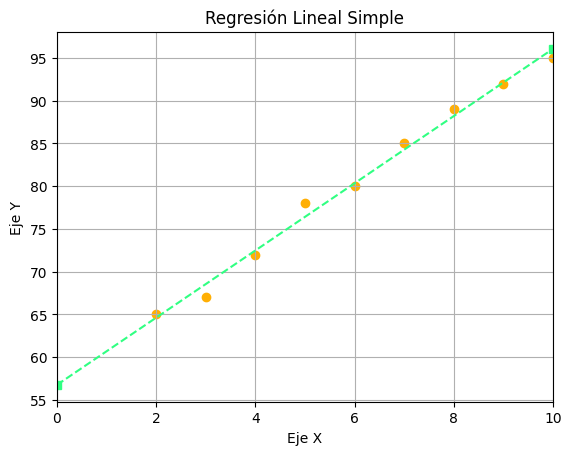

In [ ]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(x, y,color='#FFAF04')
ax.plot(x_final,y_final,marker='s', linestyle='--', color='#30FF82')

# Añadir títulos y etiquetas
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_xlim(0, 10)
ax.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
#Suma cuadrados de residuos: Comprensión de Lista
sumf =sum([(y[i] - (m * x[i] + b)) ** 2 for i in range(n)])
print("Sr:", sumf)

Sr: 7.7333333333333


In [ ]:
#Suma cuadrados de residuos: Ciclo For
sumf=0
for i in range(n):
    res_sum =(y[i]-(m*x[i]+b))**2
    sumf += res_sum
print("Sr:",sumf)

Sr: 7.7333333333333


In [ ]:
sr=sumf/n
print("sr_promedio:",sr)

sr_promedio: 0.8592592592592555


In [ ]:
rmse=sr**(1/2)
rmse_n=rmse/n
print("rmse:",rmse_n)

rmse: 0.10299582031908229


In [ ]:
x=np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y=np.array([65, 67, 72, 78, 80, 85, 89, 92, 95])

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x, y)

# Predecir los valores
y_pred = model.predict(x)

# Calcular R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

R^2: 0.9917378917378917


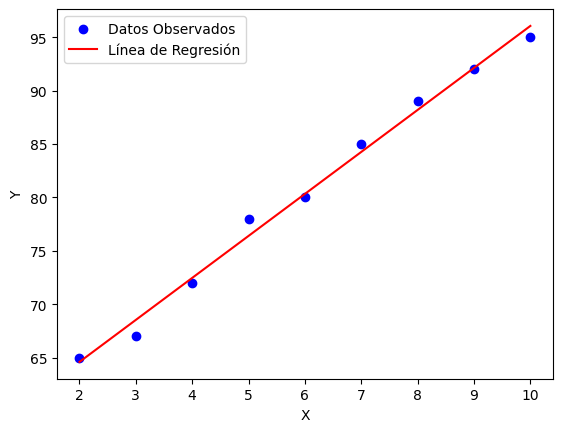

In [ ]:
plt.scatter(x, y, color='blue', label='Datos Observados')
plt.plot(x, y_pred, color='red', label='Línea de Regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

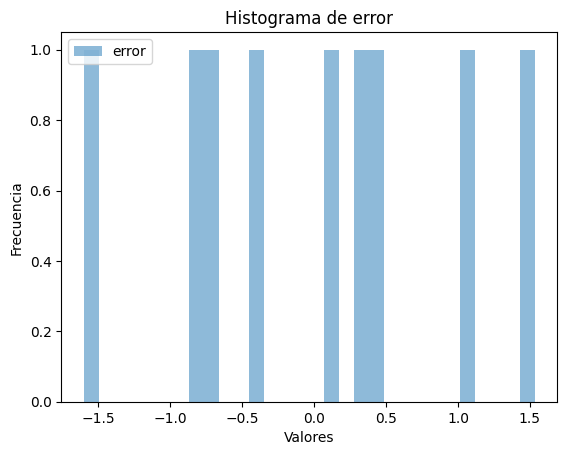

In [ ]:
import matplotlib.cm as cm

error = y_pred-y
# Graficar el histograma de y_pred
plt.hist(error, bins=30, alpha=0.5, label='error')

# Añadir títulos y etiquetas
plt.title('Histograma de error')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()